In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# **REQUIREMENTS BEFORE IMPLEMENTATION**

We need the dataset **Boston Housing**:
- Download: https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
- And rename it to: `boston_housing.csv` 
- DATA DESCRIPTION: 506 rows, 14 features
- TARGET: MEDV -- Median house price (1000 dollars)
- KEY FEATURES: CRIM, RM, LSTAT, NOX, DIS...

    CRIM: crime rate

    RM: Average number of rooms
    
    LSTAT: %lower status population



Once we have the data we need to divide it in two files:
- `train.csv` (75% )
- `test.csv` (25%)



-------------------------------------------------------------------------------------------------------------------------------------

# **KNN FUNDAMENTALS**

## *KNN ALGORITHM*
 KNN is one of the simplest machine learning algorithms. One of its advantages is that it is a non-parametric algorithm, which means that there is no assumption about the data distribution. It requires a dataset with training examples as input, and the output can be either a classification or used for regression purposes.

It can be used for both **classification** and **regression**.

- **In KNN classification**: output is class membership (majority vote of k neighbors)

    Is it diabetes?YES/NO --> Mayority vote of neighbors


- **In KNN regression**: output is continuous value (average of k neighbors' target values)

    How much does the house cost? --> Average (mean) of the neighbors prices



 **KNN INTUITION** 
The algorithm calculates the distance between the k nearest points from the training dataset and the point we want to predict.

**For regression**: the prediction is the **mean** (or weighted mean) of the target values of the k closest neighbors.


# **KNN PRESENTATION**

- Library declaration
- Create KNNRegression class
- Load Boston Housing dataset (predict house prices of the 506 houses)
- 3 feature combinations that apply KNN regression -- CRIM+RM, LSTAT+RM, CRIM+LSTAT
- Test predictions and performance analysis

**OBJECTIVE**: Find the best feature combination to predict house prices (MEDV) using KNN regression. The best predictor is the combination with the lowest MSE


## 1. DEFINITION OF KNN REGRESSOR CLASS

**1.** Distance**: Measures how "close" new house is to training houses (Euclidean distance: √((x1-x2)² + (y1-y2)²))  

**2.** K neighbors**: Finds K closest houses

**3.** Predict**: Averages their prices (regression mean)

In [2]:
class KNNRegression:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_point(self, x):
        # Calculate Euclidean distances between x and all training points
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Targets of k nearest neighbors
        k_nearest_labels = self.y_train[k_indices]
        # For regression: return the average (mean) of neighbors targets
        return np.mean(k_nearest_labels)

    def predict(self, X):
        y_pred = [self.predict_point(x) for x in X]
        return np.array(y_pred)


## 2. CHOOSING VARIABLES AND LOADING THE TRAINING DATASET

- Load the housing dataset
- In this case the following **combinations of variables** will be chosen to apply KNN regression:
  1. CRIM (crime rate) y RM (average rooms)
  2. LSTAT (% lower status) y RM (average rooms)
  3. CRIM (crime rate) y LSTAT (% lower status)
- Plot graphics of the **training datasets**


In [3]:
# Load full dataset
df = pd.read_csv('boston_housing.csv')
print("Dataset shape:", df.shape)
print(df.head())

# 3 feature combinations for house price prediction (MEDV)
print("\nFeature combinations:")
print("1. CRIM (crime rate) vs RM (rooms)")
print("2. LSTAT (lower status) vs RM (rooms)") 
print("3. CRIM (crime) vs LSTAT (lower status)")

# First combination is CRIM and RM
x1 = df[['crim', 'rm']].values
y1 = df['medv'].values  # Target: house price

# Second combination is LSTAT and RM  
x2 = df[['lstat', 'rm']].values
y2 = df['medv'].values

# Third combination is CRIM and LSTAT
x3 = df[['crim', 'lstat']].values
y3 = df['medv'].values

print("\nData loaded successfully")


Dataset shape: (506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Feature combinations:
1. CRIM (crime rate) vs RM (rooms)
2. LSTAT (lower status) vs RM (rooms)
3. CRIM (crime) vs LSTAT (lower status)

Data loaded successfully


## 3. Train/Test Split and Visualization

- Split each feature combination (75% train and 25% test)
- Visualize training data distribution (colored by real house prices)
- Prepare data for KNN regression training


Train and test split complete


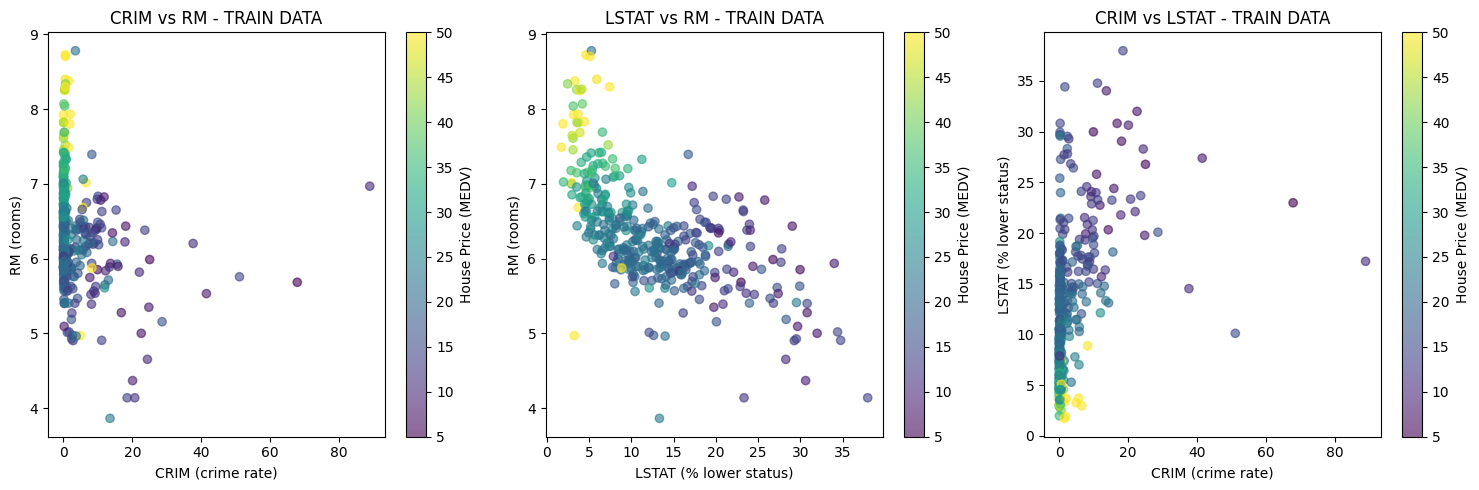

In [4]:
# Split each combination in train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.25, random_state=42)

print("Train and test split complete")

# Visualize training data 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1_train[:, 0], x1_train[:, 1], c=y1_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='House Price (MEDV)')
plt.xlabel('CRIM (crime rate)')
plt.ylabel('RM (rooms)')
plt.title('CRIM vs RM - TRAIN DATA')

plt.subplot(1, 3, 2)
plt.scatter(x2_train[:, 0], x2_train[:, 1], c=y2_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='House Price (MEDV)')
plt.xlabel('LSTAT (% lower status)')
plt.ylabel('RM (rooms)')
plt.title('LSTAT vs RM - TRAIN DATA')

plt.subplot(1, 3, 3)
plt.scatter(x3_train[:, 0], x3_train[:, 1], c=y3_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='House Price (MEDV)')
plt.xlabel('CRIM (crime rate)')
plt.ylabel('LSTAT (% lower status)')
plt.title('CRIM vs LSTAT - TRAIN DATA')

plt.tight_layout()
plt.show()


## 4. DATA TRAINING AND PREDICTION

- Train the model using the fit() function and select the value of **K** (the number of neighbors) that I will consider.
- Make predictions using the **test data variables**
- **MSE** (Mean Squared Error) determines how accurate our KNN regression is

### 4.1 LOW K VALUE
A low K value can mean overfitting: algorithm follows training noise. With k=1 it memorizes data and is sensitive to outliers.

Using CRIM+LSTAT combination to see efficiency changes:


 ---LOW K VALUE (k=1)--- 
1. CRIM+RM have a MSE: 48.40
2. LSTAT+RM have a MSE: 27.38
3. CRIM+LSTAT have a MSE: 35.94


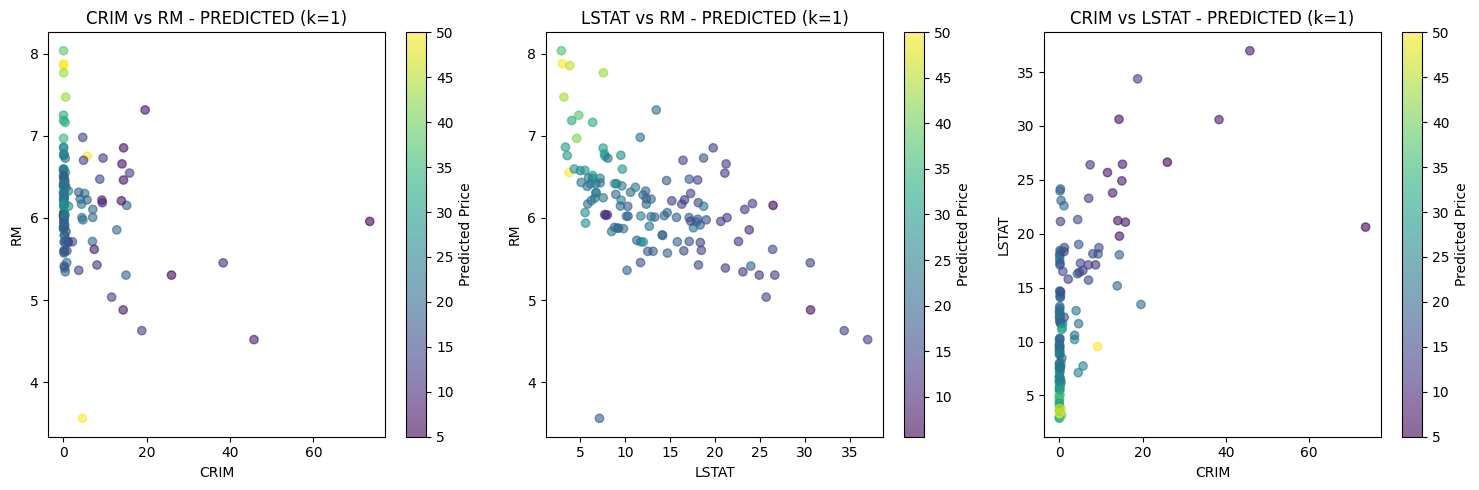

In [5]:
print(" ---LOW K VALUE (k=1)--- ")

# Train KNN with k=1
#Train first combination
knn1 = KNNRegression(k=1)
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
mse1 = np.mean((y1_pred - y1_test)**2)
print(f"1. CRIM+RM have a MSE: {mse1:.2f}")

#Train second combination
knn2 = KNNRegression(k=1)
knn2.fit(x2_train, y2_train)
y2_pred = knn2.predict(x2_test)
mse2 = np.mean((y2_pred - y2_test)**2)
print(f"2. LSTAT+RM have a MSE: {mse2:.2f}")

#Train third combination
knn3 = KNNRegression(k=1)
knn3.fit(x3_train, y3_train)
y3_pred = knn3.predict(x3_test)
mse3 = np.mean((y3_pred - y3_test)**2)
print(f"3. CRIM+LSTAT have a MSE: {mse3:.2f}")

# Visualize predictions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1_test[:, 0], x1_test[:, 1], c=y1_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('RM')
plt.title('CRIM vs RM - PREDICTED (k=1)')

plt.subplot(1, 3, 2)
plt.scatter(x2_test[:, 0], x2_test[:, 1], c=y2_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('LSTAT'); plt.ylabel('RM')
plt.title('LSTAT vs RM - PREDICTED (k=1)')

plt.subplot(1, 3, 3)
plt.scatter(x3_test[:, 0], x3_test[:, 1], c=y3_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('LSTAT')
plt.title('CRIM vs LSTAT - PREDICTED (k=1)')

plt.tight_layout()
plt.show()


### 4.2 HIGH K EXAMPLE

A **too high K** uses too much training data, making the model too simple (averages many distant points). This misses local patterns → **underfitting**.

Makes predictions too smooth, unable to capture complex price variations.

**Also**: High K favors average house prices, missing extreme values (luxury/cheap houses).

Using LSTAT+RM combination to see smoothing effect:


--- HIGH K VALUE (k=20) ---
1. CRIM+RM have a MSE: 24.72
2. LSTAT+RM have a MSE: 20.70
3. CRIM+LSTAT have a MSE: 25.48


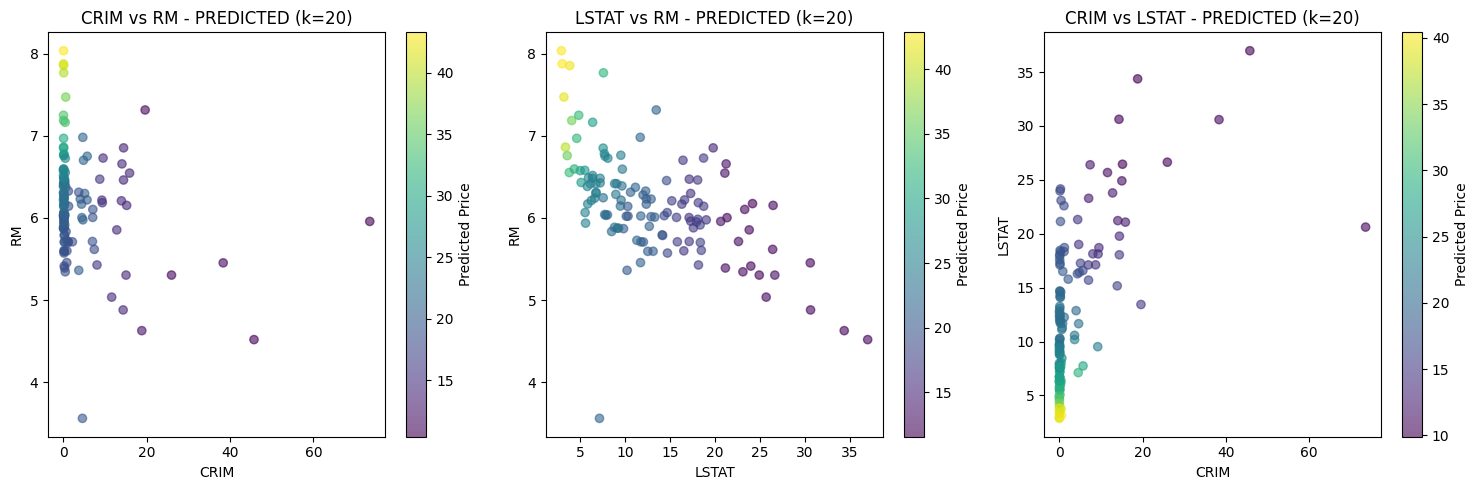

In [6]:

print("--- HIGH K VALUE (k=20) ---")

# Train with high k=20
#Train first combination
knn1 = KNNRegression(k=20)
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
mse1 = np.mean((y1_pred - y1_test)**2)
print(f"1. CRIM+RM have a MSE: {mse1:.2f}")

#Train second combination
knn2 = KNNRegression(k=20)
knn2.fit(x2_train, y2_train)
y2_pred = knn2.predict(x2_test)
mse2 = np.mean((y2_pred - y2_test)**2)
print(f"2. LSTAT+RM have a MSE: {mse2:.2f}")

#Train third combination
knn3 = KNNRegression(k=20)
knn3.fit(x3_train, y3_train)
y3_pred = knn3.predict(x3_test)
mse3 = np.mean((y3_pred - y3_test)**2)
print(f"3. CRIM+LSTAT have a MSE: {mse3:.2f}")

# Visualize predictions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1_test[:, 0], x1_test[:, 1], c=y1_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('RM')
plt.title('CRIM vs RM - PREDICTED (k=20)')

plt.subplot(1, 3, 2)
plt.scatter(x2_test[:, 0], x2_test[:, 1], c=y2_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('LSTAT'); plt.ylabel('RM')
plt.title('LSTAT vs RM - PREDICTED (k=20)')

plt.subplot(1, 3, 3)
plt.scatter(x3_test[:, 0], x3_test[:, 1], c=y3_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('LSTAT')
plt.title('CRIM vs LSTAT - PREDICTED (k=20)')

plt.tight_layout()
plt.show()


### 4.3 OPTIMAL K VALUE

**So what's the optimal number of K?**

Common rule: K ≈ √(number of training samples per combination)(~7 for our splits)

**Important**: Use odd numbers to avoid prediction ties.

**Best way**: Test different K and measure MSE performance.


--- OPTIMAL K VALUE (k=7) ---
1. CRIM+RM hae a MSE: 25.84
2. LSTAT+RM have a MSE: 19.65
3. CRIM+LSTAT have a MSE: 26.01


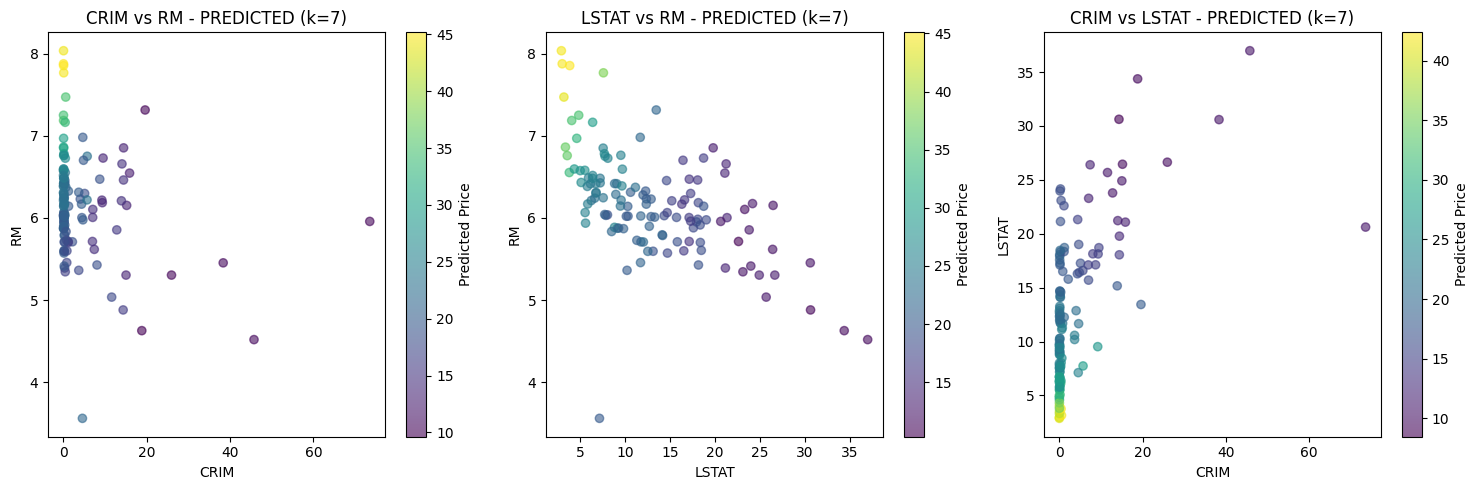

In [7]:

print("--- OPTIMAL K VALUE (k=7) ---")

# Train with optimal k=7 
#Train first combination
knn1 = KNNRegression(k=7)
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
mse1 = np.mean((y1_pred - y1_test)**2)
print(f"1. CRIM+RM hae a MSE: {mse1:.2f}")

#Train second combination
knn2 = KNNRegression(k=7)
knn2.fit(x2_train, y2_train)
y2_pred = knn2.predict(x2_test)
mse2 = np.mean((y2_pred - y2_test)**2)
print(f"2. LSTAT+RM have a MSE: {mse2:.2f}")

#Train third combination
knn3 = KNNRegression(k=7)
knn3.fit(x3_train, y3_train)
y3_pred = knn3.predict(x3_test)
mse3 = np.mean((y3_pred - y3_test)**2)
print(f"3. CRIM+LSTAT have a MSE: {mse3:.2f}")

# Visualize (best should be LSTAT+RM like in the other two k=1 an k=20)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1_test[:, 0], x1_test[:, 1], c=y1_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('RM')
plt.title('CRIM vs RM - PREDICTED (k=7)')

plt.subplot(1, 3, 2)
plt.scatter(x2_test[:, 0], x2_test[:, 1], c=y2_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('LSTAT'); plt.ylabel('RM')
plt.title('LSTAT vs RM - PREDICTED (k=7)')

plt.subplot(1, 3, 3)
plt.scatter(x3_test[:, 0], x3_test[:, 1], c=y3_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Price')
plt.xlabel('CRIM'); plt.ylabel('LSTAT')
plt.title('CRIM vs LSTAT - PREDICTED (k=7)')

plt.tight_layout()
plt.show()


## **5. CONCLUSION**

After comparing different K values, I observe:
- **Low K (k=1)**: High variance/overfitting 
- **High K (k=20)**: High bias/undersmoothing  
- **Optimal K (k=7)**: Best bias-variance tradeoff

**Best feature combination**: LSTAT + RM (lowest MSE)

KNN Regression successfully predicts house prices from spatial features. 







## **CONTRIBUTORS**
Sol Conde Vivar

Aprendizaje automatico

ADE-INF

2026